In [17]:
import os

# Use images in test dir (update this if you have other images for inference)
IMAGE_DIR = os.path.join("test_images")
IMAGE_PATHS = []

for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

IMAGE_PATHS

['test_images\\1.jpg',
 'test_images\\3000.jpg',
 'test_images\\36489593-a-house-roof-on-fire-and-smoke-.jpg',
 'test_images\\f58e23af98258ba57c4fea6cccb10bcd.jpg',
 'test_images\\Flames-02-PREVIEW.jpg',
 'test_images\\house-fire.jpg',
 'test_images\\images.jpg',
 'test_images\\Landscape_view_of_wildfire_near_Highway_63_in_south_Fort_McMurray.jpg',
 'test_images\\PIR03642.jpg',
 'test_images\\PIR03661.jpg',
 'test_images\\Science_australiafires-1191951200.jpg',
 'test_images\\test.jpg']

In [2]:
%cd /content

import time
import tensorflow as tf # Added as colab instance often crash
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

# Label Map path
PATH_TO_LABELS = "training/labelmap.pbtxt"
# Saved model path
PATH_TO_SAVED_MODEL = os.path.join("inference_graph","saved_model")

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# Set category index
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


[WinError 2] The system cannot find the file specified: '/content'
C:\Users\kle_c\Desktop\dinesh\models\research\object_detection
Loading model...Done! Took 38.976325035095215 seconds


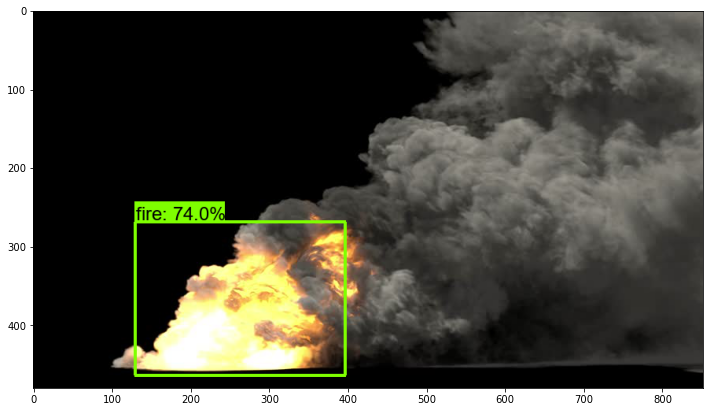

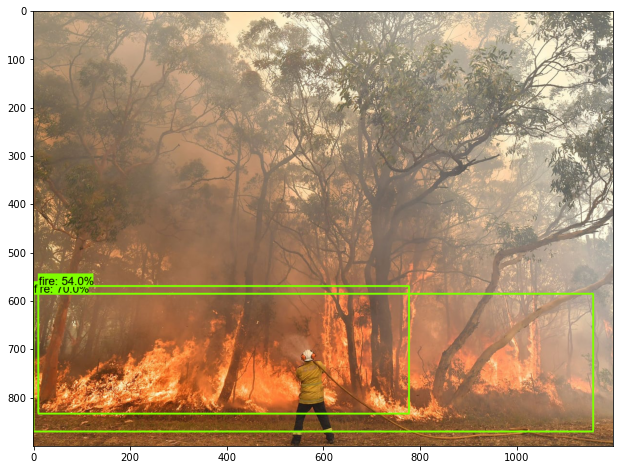

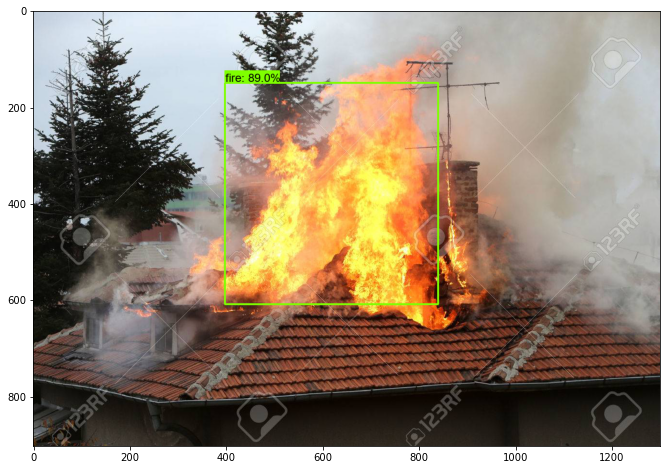

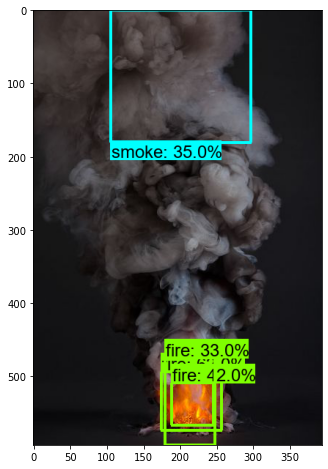

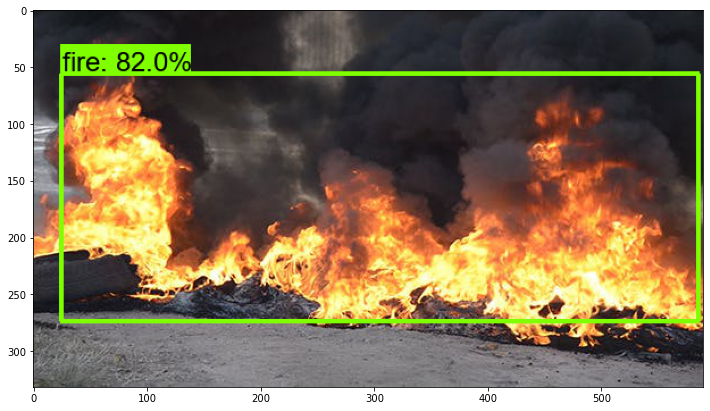

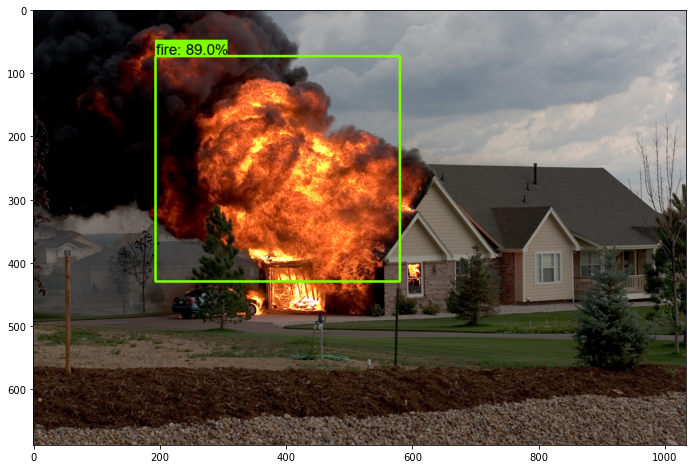

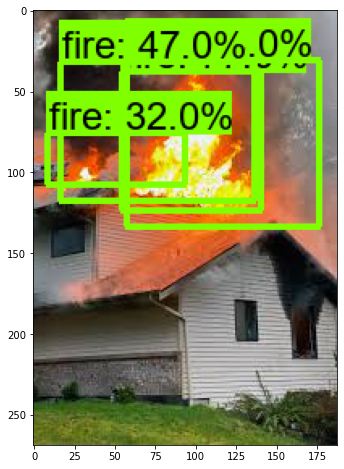

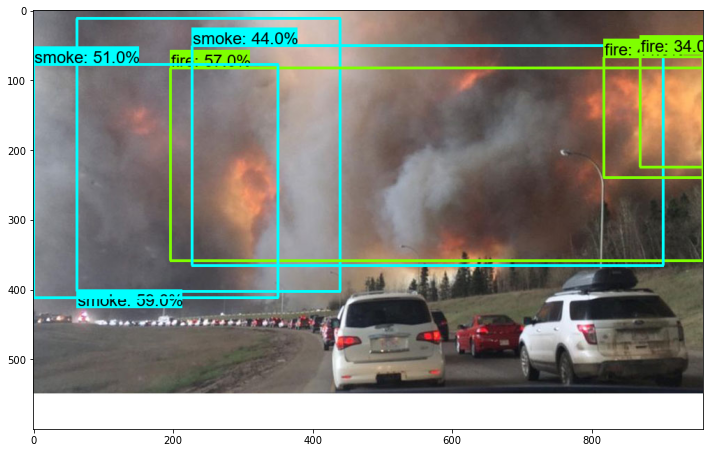

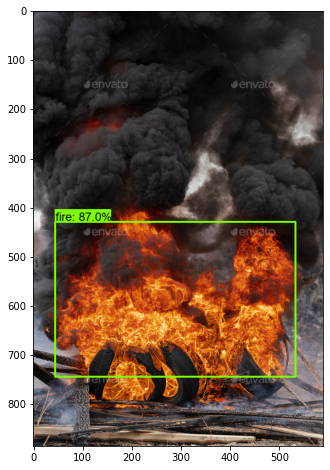

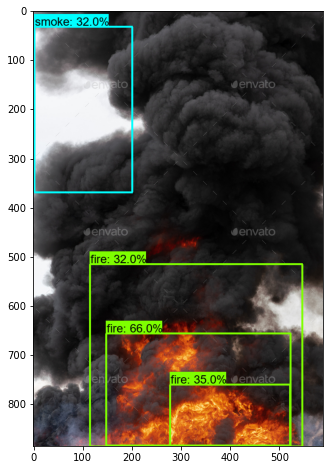

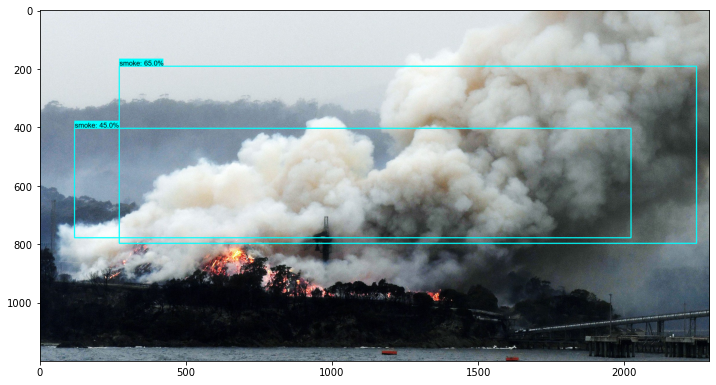

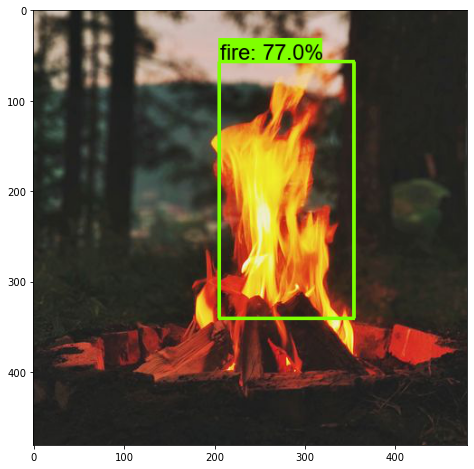

In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
# This is required to display the images.
%matplotlib inline

for image_path in IMAGE_PATHS:

    #print('Running inference for {}... '.format(image_path), end='')

    # Puts image into numpy array to feed into tensorflow graph.
    # Note that by convention we put it into a numpy array with shape
    #   (height, width, channels), where channels=3 for RGB.
    image_np = np.array(Image.open(image_path))

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=20,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure(figsize = (12,8))
    plt.imshow(image_np_with_detections)
    #print('Done')
plt.show()